In [1]:
# To upload our datasets from our working directory we need to mount our drive contents to the colab environment. 
# For the code to do so you can search “mount” in code snippets or use the code given below. 
# Our entire drive contents are now mounted on colab at the location “/gdrive”.

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)#displaying long list of columns
pd.set_option('display.max_rows', None)#displaying long list of rows
pd.set_option('display.width', 1000)#width of window
import statsmodels.api as sm


file = r'/gdrive/My Drive/python3/python 3A missing value/data_scientist_take_home_assignment_final.csv'
Data = pd.read_csv(file)  #creates a dataframe

print(Data.shape)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(12132, 23)


In [2]:
Data.head()

,Rep ID,Start Time,End Time,Checklist - Why are you interested in one of our insurance policies today?,Checklist - What sparked your interest in insurance at this time?,Checklist - Has anything changed in your living situation since your last policy got started?,Checklist - What's most important to you in an insurance company?,Checklist - Why didn't you move forward with the last quote you received?,Checklist - What would you like to change about your current insurance coverage?,"Checklist - What do you find most important: price, coverarge, or something else?",Checklist - What do you most dislike about your current insurance?,Checklist - Have you worked with other insurance companies before--what was that like?,Checklist - Please confirm for me that you want to apply for an insurance policy today with us.,Postcall - communication skills - active listening,Postcall - communication skills - agent expressed appreciation,Postcall - communication skills - agent proactivity,Postcall - communication skills - customer compliment,Postcall - communication skills - customer expressed appreciation,Postcall - communication skills - empathy,Postcall - communication skills - justification,Postcall - communication skills - urgency,QuoteCount,SoldCount
0,662,6/7/20 16:29,6/7/20 16:41,0,1,0,1,1,0,0,0,0,0,1,0,2,0,1,0,6,1,1,0
1,387,6/7/20 16:32,6/7/20 16:56,0,1,0,0,0,0,1,0,0,1,1,21,10,0,1,1,11,2,0,0
2,662,6/7/20 17:02,6/7/20 17:19,0,1,0,0,0,0,0,0,0,0,0,0,4,0,2,0,1,0,1,0
3,662,6/7/20 18:13,6/7/20 18:39,0,1,0,0,0,0,0,0,0,0,0,1,1,0,7,1,1,0,1,0
4,387,6/7/20 18:45,6/7/20 18:48,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0


In [3]:
#look at what other columns have missing values
Data.isnull().sum()

Rep ID                                                                                             0
Start Time                                                                                         0
End Time                                                                                           0
Checklist - Why are you interested in one of our insurance policies today?                         0
Checklist - What sparked your interest in insurance at this time?                                  0
Checklist - Has anything changed in your living situation since your last policy got started?      0
Checklist - What's most important to you in an insurance company?                                  0
Checklist - Why didn't you move forward with the last quote you received?                          0
Checklist - What would you like to change about your current insurance coverage?                   0
Checklist - What do you find most important: price, coverarge, or something else?          

In [4]:
#summarize the data
Data.describe()

,Rep ID,Checklist - Why are you interested in one of our insurance policies today?,Checklist - What sparked your interest in insurance at this time?,Checklist - Has anything changed in your living situation since your last policy got started?,Checklist - What's most important to you in an insurance company?,Checklist - Why didn't you move forward with the last quote you received?,Checklist - What would you like to change about your current insurance coverage?,"Checklist - What do you find most important: price, coverarge, or something else?",Checklist - What do you most dislike about your current insurance?,Checklist - Have you worked with other insurance companies before--what was that like?,Checklist - Please confirm for me that you want to apply for an insurance policy today with us.,Postcall - communication skills - active listening,Postcall - communication skills - agent expressed appreciation,Postcall - communication skills - agent proactivity,Postcall - communication skills - customer compliment,Postcall - communication skills - customer expressed appreciation,Postcall - communication skills - empathy,Postcall - communication skills - justification,Postcall - communication skills - urgency,QuoteCount,SoldCount
count,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000
mean,482.970656,0.095945,0.490603,0.011128,0.139383,0.215875,0.098005,0.060501,0.013188,0.050775,0.167738,0.184306,3.470244,5.865892,0.042450,1.822453,1.019205,4.881058,1.359710,0.518793,0.223459
std,201.981034,0.294527,0.499932,0.104903,0.346360,0.411445,0.297334,0.238423,0.114085,0.219547,0.373649,0.514395,5.410053,7.056952,0.218873,2.551967,1.848488,7.310282,2.158775,0.499667,0.416580
min,161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,358.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,494.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000
75%,662.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,9.000000,0.000000,2.000000,1.000000,7.000000,2.000000,1.000000,0.000000
max,931.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,113.000000,234.000000,4.000000,147.000000,28.000000,270.000000,66.000000,1.000000,1.000000


In [5]:
Data.std()

Rep ID                                                                                             201.981034
Checklist - Why are you interested in one of our insurance policies today?                           0.294527
Checklist - What sparked your interest in insurance at this time?                                    0.499932
Checklist - Has anything changed in your living situation since your last policy got started?        0.104903
Checklist - What's most important to you in an insurance company?                                    0.346360
Checklist - Why didn't you move forward with the last quote you received?                            0.411445
Checklist - What would you like to change about your current insurance coverage?                     0.297334
Checklist - What do you find most important: price, coverarge, or something else?                    0.238423
Checklist - What do you most dislike about your current insurance?                                   0.114085
Checklist 

In [7]:
df_num = Data.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['SoldCount'] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.3].sort_values(ascending=False)
print("There is {} strongly correlated values with :\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with :
SoldCount                                                                                          1.000000
QuoteCount                                                                                         0.516636
Checklist - Please confirm for me that you want to apply for an insurance policy today with us.    0.497425
Postcall - communication skills - agent proactivity                                                0.310762
Name: SoldCount, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1342: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)


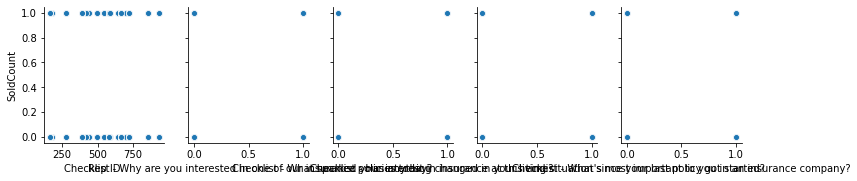

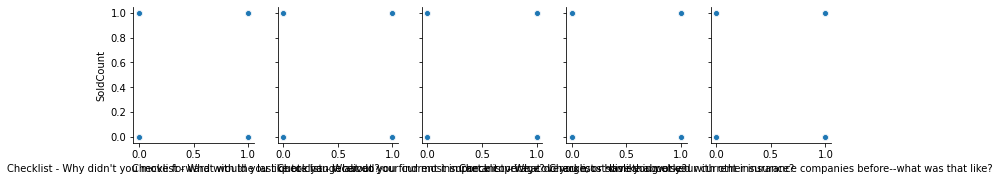

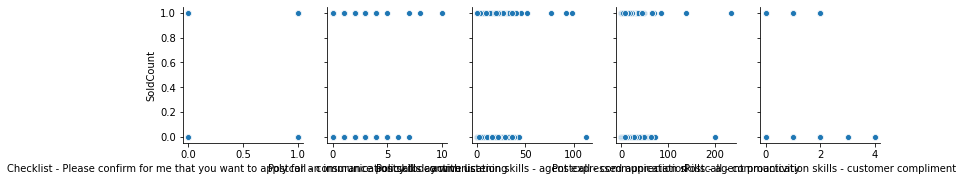

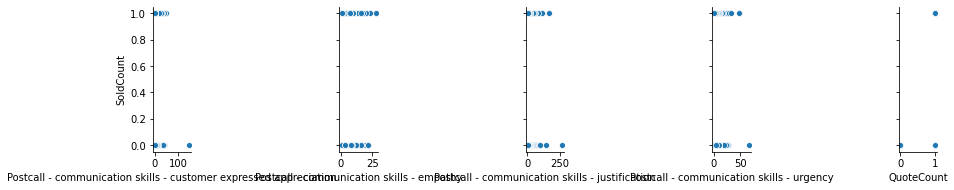

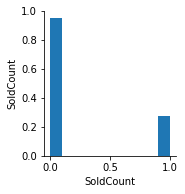

In [8]:
import seaborn as sns
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SoldCount'])

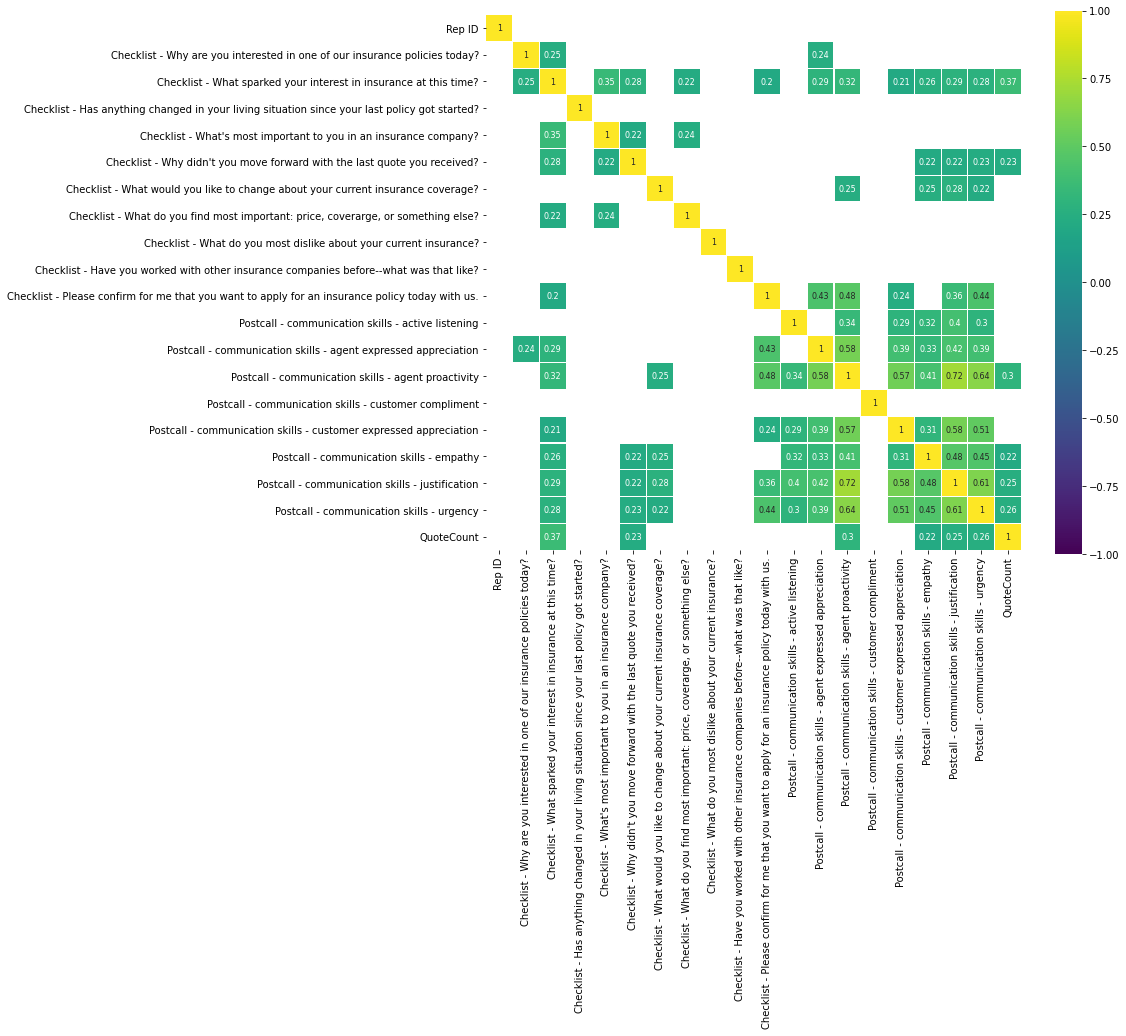

In [9]:
import matplotlib.pyplot as plt
corr = df_num.drop('SoldCount', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


In [13]:
df1 = Data[['Rep ID',
 'Checklist - Why are you interested in one of our insurance policies today?',
 'Checklist - What sparked your interest in insurance at this time?',
 'Checklist - Has anything changed in your living situation since your last policy got started?',
 "Checklist - What's most important to you in an insurance company?",
 "Checklist - Why didn't you move forward with the last quote you received?",
 'Checklist - What would you like to change about your current insurance coverage?',
 'Checklist - What do you find most important: price, coverarge, or something else?',
 'Checklist - What do you most dislike about your current insurance?',
 'Checklist - Have you worked with other insurance companies before--what was that like?',
 'Checklist - Please confirm for me that you want to apply for an insurance policy today with us.',
 'Postcall - communication skills - active listening',
 'Postcall - communication skills - agent expressed appreciation',
 'Postcall - communication skills - agent proactivity',
 'Postcall - communication skills - customer compliment',
 'Postcall - communication skills - customer expressed appreciation',
 'Postcall - communication skills - empathy',
 'Postcall - communication skills - justification',
 'Postcall - communication skills - urgency','SoldCount']]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
 
x = df1.drop('SoldCount', axis=1)
y = df1['SoldCount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      3094
           1       0.69      0.42      0.52       910

    accuracy                           0.83      4004
   macro avg       0.77      0.68      0.71      4004
weighted avg       0.81      0.83      0.81      4004

[[2927  167]
 [ 532  378]]
0.8254245754245755


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


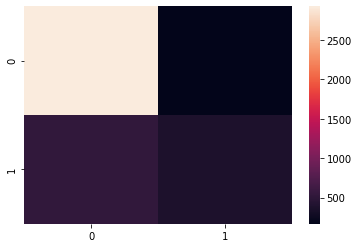

In [14]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)))
plt.show()

Reading the modified file:

In [19]:
file1 = r'/gdrive/My Drive/python3/python 3A missing value/modify.csv'
Data1 = pd.read_csv(file)  #creates a dataframe

In [20]:
Data1.head()

,Rep ID,Start Time,End Time,Checklist - Why are you interested in one of our insurance policies today?,Checklist - What sparked your interest in insurance at this time?,Checklist - Has anything changed in your living situation since your last policy got started?,Checklist - What's most important to you in an insurance company?,Checklist - Why didn't you move forward with the last quote you received?,Checklist - What would you like to change about your current insurance coverage?,"Checklist - What do you find most important: price, coverarge, or something else?",Checklist - What do you most dislike about your current insurance?,Checklist - Have you worked with other insurance companies before--what was that like?,Checklist - Please confirm for me that you want to apply for an insurance policy today with us.,Postcall - communication skills - active listening,Postcall - communication skills - agent expressed appreciation,Postcall - communication skills - agent proactivity,Postcall - communication skills - customer compliment,Postcall - communication skills - customer expressed appreciation,Postcall - communication skills - empathy,Postcall - communication skills - justification,Postcall - communication skills - urgency,QuoteCount,SoldCount
0,662,6/7/20 16:29,6/7/20 16:41,0,1,0,1,1,0,0,0,0,0,1,0,2,0,1,0,6,1,1,0
1,387,6/7/20 16:32,6/7/20 16:56,0,1,0,0,0,0,1,0,0,1,1,21,10,0,1,1,11,2,0,0
2,662,6/7/20 17:02,6/7/20 17:19,0,1,0,0,0,0,0,0,0,0,0,0,4,0,2,0,1,0,1,0
3,662,6/7/20 18:13,6/7/20 18:39,0,1,0,0,0,0,0,0,0,0,0,1,1,0,7,1,1,0,1,0
4,387,6/7/20 18:45,6/7/20 18:48,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
